<h1 style="color:orangered;">SALES ANALYSIS OF SUPERMARKET</h1>


1.Importing all the libraries which is needed in it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px 


2.Connect all the csv with the crossponding items.

In [2]:
item_category = pd.read_csv('annex1.csv')
sales = pd.read_csv('annex2.csv')
wholesale = pd.read_csv('annex3.csv')
loss_rate = pd.read_csv('annex4.csv')

def clean_column_names(df):
    df.columns = [re.sub(r'\s+', '_', col).lower() for col in df.columns]
    return df


<h3 style="color:crimson;">Explore the item_category table</h3>

3.head means it gives 1st five rows of table.

In [3]:
item_category.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


4.Finding the number of unique elements present in item_table.

In [4]:
print("Checking rows & colums, Rows: {}, Columns: {}".format(item_category.shape[0], item_category.shape[1]))
print(item_category.nunique())

Checking rows & colums, Rows: 251, Columns: 4
Item Code        251
Item Name        247
Category Code      6
Category Name      6
dtype: int64


5.Check all the null values in the columns.

In [5]:
item_category.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

6.Count the dublicate numbers in item_category.

In [6]:
item_category.duplicated().sum()

np.int64(0)

7.Finding the unique element from all the colums.

In [7]:
for i in item_category.columns:
    print(i)
    print(item_category[i].unique())
    print("**************************************************************************")

Item Code
[102900005115168 102900005115199 102900005115625 102900005115748
 102900005115762 102900005115779 102900005115786 102900005115793
 102900005115816 102900005115823 102900005115854 102900005115861
 102900005115878 102900005115885 102900005115908 102900005115946
 102900005115960 102900005115977 102900005115984 102900005116639
 102900005116776 102900005116790 102900005116806 102900005118572
 102900005118817 102900005118831 102900005119975 102900005122654
 102900005128748 102900011000175 102900011000571 102900011002414
 102900011006689 102900011006948 102900011006955 102900011007464
 102900011007471 102900011007495 102900011008133 102900011008164
 102900011008485 102900011008492 102900011008515 102900011008522
 102900011008676 102900011015384 102900011015391 102900011021644
 102900011022849 102900011022924 102900011023464 102900011026502
 102900011026618 102900011027462 102900011027615 102900011029688
 102900011030042 102900011030059 102900011030097 102900011030103
 10290001103011

8.Checking the data types of item_category.

In [8]:
item_category.dtypes

Item Code         int64
Item Name        object
Category Code     int64
Category Name    object
dtype: object

9.It return stats of numerical values columns.

In [9]:
item_category.describe().astype(int)

,Item Code,Category Code
count,251,251
mean,103190825064436,1011010414
std,1048400107277,291
min,102900005115168,1011010101
25%,102900011001626,1011010101
50%,102900011029275,1011010501
75%,102900011033746,1011010801
max,106973990980123,1011010801


<h3 style="color:crimson;">Exploring The Sales Table</h3>

10.First five rows of sales table.

In [10]:
sales.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


11.checking data types of sales table.

In [11]:
sales.dtypes

Date                            object
Time                            object
Item Code                        int64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
dtype: object

12.Converting datatype into datetime.

In [12]:
sales['Date'] = pd.to_datetime(sales['Date'])

13.Checking the converted datatypes.

In [13]:
sales.dtypes

Date                           datetime64[ns]
Time                                   object
Item Code                               int64
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

14.Checking the null values of the coloumns.

In [14]:
sales.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
dtype: int64

15.Checking the duplicate values in the coloumns.


In [15]:
sales.duplicated().sum()

np.int64(0)

16.Checking the unique values or elements in the sales table.

In [16]:
print("Checking rows & columns, Rows: {}, Columns: {}".format(sales.shape[0], sales.shape[1]))
print(sales.nunique())

Checking rows & columns, Rows: 878503, Columns: 7
Date                             1085
Time                           849632
Item Code                         246
Quantity Sold (kilo)             2794
Unit Selling Price (RMB/kg)       264
Sale or Return                      2
Discount (Yes/No)                   2
dtype: int64


In [17]:
sales.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


<h3 style="color:crimson;">Exploring The Wholesales Table</h3>

17.First five rows of wholesales table.

In [18]:
wholesale.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


18.Datatypes of wholesales table.

In [19]:
wholesale.dtypes

Date                         object
Item Code                     int64
Wholesale Price (RMB/kg)    float64
dtype: object

19.converting the dtypes into datetime.

In [20]:
wholesale['Date'] = pd.to_datetime(wholesale['Date'])

20.Checking the converted dtypes.

In [21]:
wholesale.dtypes

Date                        datetime64[ns]
Item Code                            int64
Wholesale Price (RMB/kg)           float64
dtype: object

21.Checking the unique numbers in wholes sales table.

In [22]:
print("Checking rows & columns, Rows: {}, Columns: {}".format(wholesale.shape[0], wholesale.shape[1]))
print(wholesale.nunique())

Checking rows & columns, Rows: 55982, Columns: 3
Date                        1091
Item Code                    251
Wholesale Price (RMB/kg)    2380
dtype: int64


22.Checking the dublicate element in wholesales table.

In [23]:
wholesale.duplicated().sum()

np.int64(0)

23.Finding the unique element from all the colums.

In [24]:
for i in wholesale.columns:
    print(i)
    print(wholesale[i].unique())
    print("**************************************************************************")

Date
<DatetimeArray>
['2020-07-01 00:00:00', '2020-07-02 00:00:00', '2020-07-03 00:00:00',
 '2020-07-04 00:00:00', '2020-07-05 00:00:00', '2020-07-06 00:00:00',
 '2020-07-07 00:00:00', '2020-07-08 00:00:00', '2020-07-09 00:00:00',
 '2020-07-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 1091, dtype: datetime64[ns]
**************************************************************************
Item Code
[102900005115762 102900005115779 102900005115786 102900005115793
 102900005115823 102900005115908 102900005115946 102900005115960
 102900005115984 102900005116226 102900005116233 102900005116257
 102900005116509 102900005116530 102900005116547 102900005116714
 102900005116790 102900005116912 102900005116943 102900005117056
 102900005117209 102900005118817 102900005118824 10290000511

24.It return stats of numerical values columns.

In [25]:
wholesale.describe().select_dtypes(include='number').astype(int)

,Item Code,Wholesale Price (RMB/kg)
count,55982,55982
mean,103044945365014,5
min,102900005115168,0
25%,102900005116547,2
50%,102900011000328,4
75%,102900011030141,7
max,106973990980123,141
std,752792703273,5


<h3 style="color:crimson;">Exploring The Loss Rate Table</h3>

25.First five rows of lossrate table.

In [26]:
loss_rate.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


26.Checking the data type of loss_rate table.

In [27]:
loss_rate.dtypes

Item Code          int64
Item Name         object
Loss Rate (%)    float64
dtype: object

27.checkingn the null values in all coloumns of loss_rate table

In [28]:
loss_rate.isnull().sum()

Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64

28.it will give stats of the numerical values coloumns.

In [29]:
loss_rate.describe().astype(int)

,Item Code,Loss Rate (%)
count,251,251
mean,103190825064436,9
std,1048400107277,5
min,102900005115168,0
25%,102900011001626,8
50%,102900011029275,9
75%,102900011033746,11
max,106973990980123,29


<h3 style="color:crimson";>Merging / Combining the data</h3>

29.first two row of sales table.

In [30]:
sales.head(2)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No


30.first two rows of wholesales table.

In [31]:
wholesale.head(2)

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72


31.first two rows of item category tables.

In [32]:
item_category.head(2)

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables


32.first two rows of loss rate table.

In [33]:
loss_rate.head(2)

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46


33.Combining the sales and wholesales data and print first two rows.

In [34]:
sales_wholesale_combine_data = pd.merge(sales, wholesale, how="left", on=["Item Code", "Date"])
sales_wholesale_combine_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60


34.Checking the null elements in sales and wholesales data.

In [35]:
sales_wholesale_combine_data.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
dtype: int64

In [36]:
sales_wholesale_category = pd.merge(sales_wholesale_combine_data, item_category, how="left", on="Item Code")
sales_wholesale_category.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables


In [37]:
final_data = pd.merge(sales_wholesale_category, loss_rate, how="left", on=["Item Code", "Item Name"])
final_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70


In [38]:
print(final_data.columns.tolist())

['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)', 'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)', 'Wholesale Price (RMB/kg)', 'Item Name', 'Category Code', 'Category Name', 'Loss Rate (%)']


In [39]:
final_data.columns=final_data.columns.str.strip()

In [40]:
for col in final_data.columns:
    print(repr(col))

'Date'
'Time'
'Item Code'
'Quantity Sold (kilo)'
'Unit Selling Price (RMB/kg)'
'Sale or Return'
'Discount (Yes/No)'
'Wholesale Price (RMB/kg)'
'Item Name'
'Category Code'
'Category Name'
'Loss Rate (%)'


In [41]:
final_data['total_sales'] = final_data['Quantity Sold (kilo)']*final_data['Unit Selling Price (RMB/kg)']


In [42]:
final_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%),total_sales
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.0096
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,2.7168
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.1084
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43,4.2100
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70,4.3120


In [43]:
final_data.isnull().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Wholesale Price (RMB/kg)       0
Item Name                      0
Category Code                  0
Category Name                  0
Loss Rate (%)                  0
total_sales                    0
dtype: int64

In [44]:
final_data["Item Name"].nunique()
final_data["Category Name"].nunique()

6

In [45]:
category_name_wise_sales = final_data.groupby("Category Name")["total_sales"].sum().reset_index()
category_name_wise_sales["total_sales"] = category_name_wise_sales["total_sales"].astype(int)

In [46]:
category_name_wise_sales

,Category Name,total_sales
0,Aquatic Tuberous Vegetables,350089
1,Cabbage,375751
2,Capsicum,754133
3,Edible Mushroom,619597
4,Flower/Leaf Vegetables,1079069
5,Solanum,191124


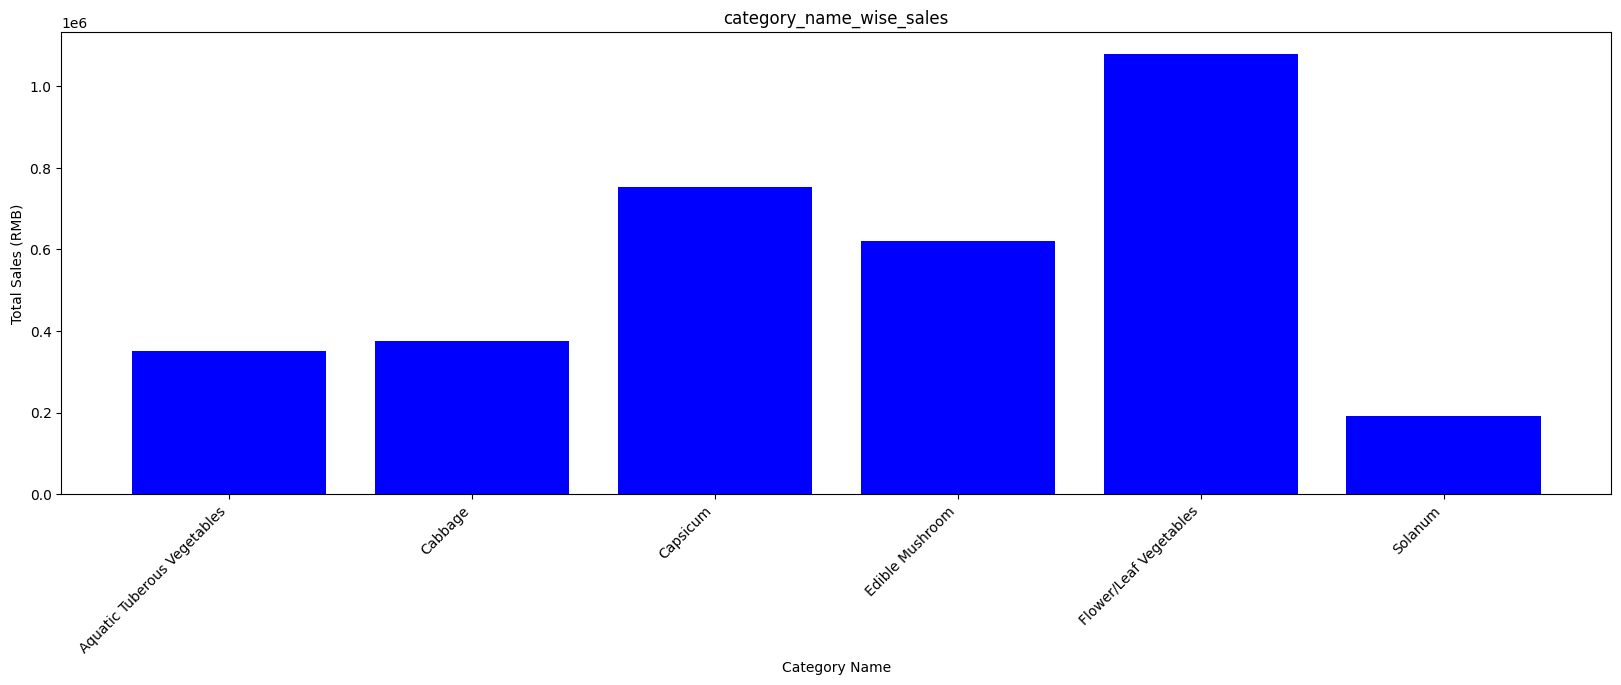

In [47]:
plt.figure(figsize=(20, 6))
plt.bar(category_name_wise_sales["Category Name"], category_name_wise_sales["total_sales"], color='blue')
plt.xlabel("Category Name")
plt.ylabel("Total Sales (RMB)")
plt.title("category_name_wise_sales")
plt.xticks(rotation=45, ha='right')
plt.savefig('category_name_wise_sales.png')
plt.show()

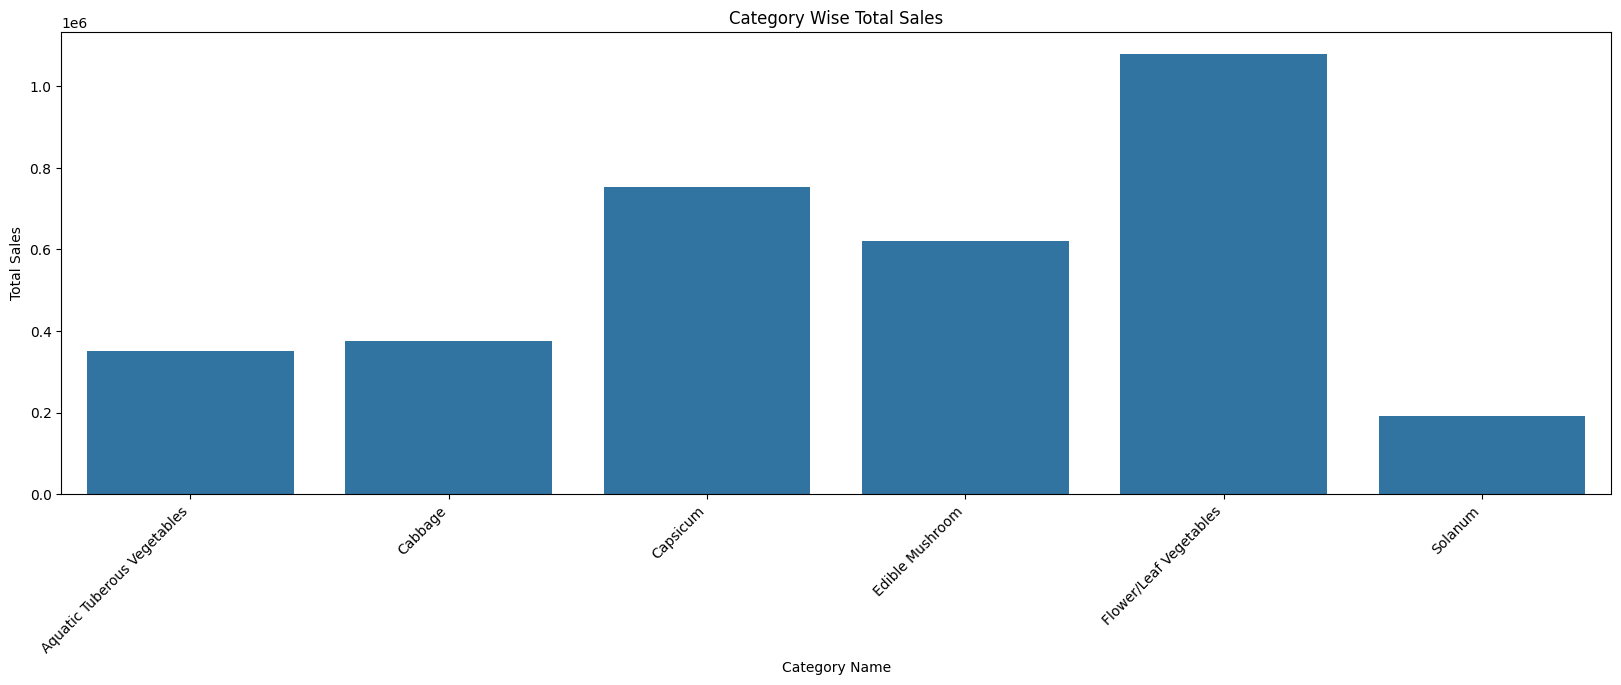

In [48]:
plt.figure(figsize=(20, 6))
sns.barplot(x="Category Name", y="total_sales", data=category_name_wise_sales)
plt.xlabel("Category Name")
plt.ylabel("Total Sales")
plt.title("Category Wise Total Sales")
plt.xticks(rotation=45, ha='right') 
plt.savefig('category wise total sales.png')
plt.show()

In [49]:
fig = px.bar(category_name_wise_sales, x='Category Name', y='total_sales', title='Category Wise Total Sales')
fig.update_layout(xaxis=dict(tickangle=45))
plt.savefig('category name.png')
fig.show()

<Figure size 640x480 with 0 Axes>

In [50]:
category_name_wise_sales

,Category Name,total_sales
0,Aquatic Tuberous Vegetables,350089
1,Cabbage,375751
2,Capsicum,754133
3,Edible Mushroom,619597
4,Flower/Leaf Vegetables,1079069
5,Solanum,191124


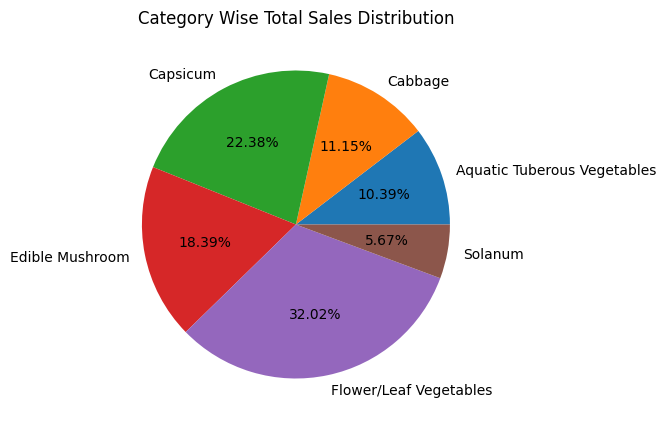

In [51]:
plt.figure(figsize=(5, 5))
plt.pie(category_name_wise_sales['total_sales'], labels=category_name_wise_sales['Category Name'], autopct='%1.2f%%')
plt.title('Category Wise Total Sales Distribution')
plt.savefig('saleDistribution.png')
plt.show()

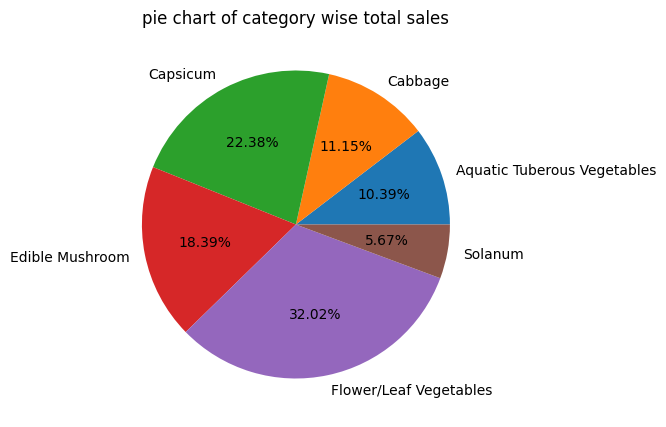

In [52]:
plt.figure(figsize=(5, 5))
plt.pie(category_name_wise_sales['total_sales'], labels=category_name_wise_sales['Category Name'], autopct='%1.2f%%')
plt.title('pie chart of category wise total sales')
plt.savefig('PieChartCategoryTotalSale.png')
plt.show()

In [53]:
fig = px.pie(category_name_wise_sales, values='total_sales', names='Category Name', title='Category Wise Total Sales Distribution')
plt.savefig('Sales Distribution.png')
fig.show()

<Figure size 640x480 with 0 Axes>

In [54]:
final_data['Date'] = pd.to_datetime(final_data['Date'],errors='coerce')

In [55]:
final_data['Year'] = final_data['Date'].dt.year
final_data['Month'] = final_data['Date'].dt.month_name()


In [56]:
final_data

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%),total_sales,Year,Month
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.0096,2020,July
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No,2.10,Chinese Cabbage,1011010101,Flower/Leaf Vegetables,22.27,2.7168,2020,July
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1011010504,Capsicum,7.08,3.1084,2020,July
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No,7.03,Shanghaiqing,1011010101,Flower/Leaf Vegetables,14.43,4.2100,2020,July
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No,4.60,Caixin,1011010101,Flower/Leaf Vegetables,13.70,4.3120,2020,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878498,2023-06-30,21:35:13.264,102900005115250,0.284,24.0,sale,No,15.60,Xixia Black Mushroom (1),1011010801,Edible Mushroom,10.80,6.8160,2023,June
878499,2023-06-30,21:35:14.358,102900011022764,0.669,12.0,sale,No,7.00,Changxianqie,1011010501,Solanum,6.90,8.0280,2023,June
878500,2023-06-30,21:35:20.264,102900005115250,0.125,24.0,sale,No,15.60,Xixia Black Mushroom (1),1011010801,Edible Mushroom,10.80,3.0000,2023,June
878501,2023-06-30,21:35:21.509,102900011016701,0.252,5.2,sale,No,3.63,Wuhu Green Pepper (1),1011010504,Capsicum,5.70,1.3104,2023,June


In [57]:
sales_trend = final_data.groupby(final_data['Date'].dt.year)['total_sales'].sum().reset_index()
sales_trend

,Date,total_sales
0,2020,6.695293e+05
1,2021,1.100363e+06
2,2022,1.036772e+06
3,2023,5.631021e+05


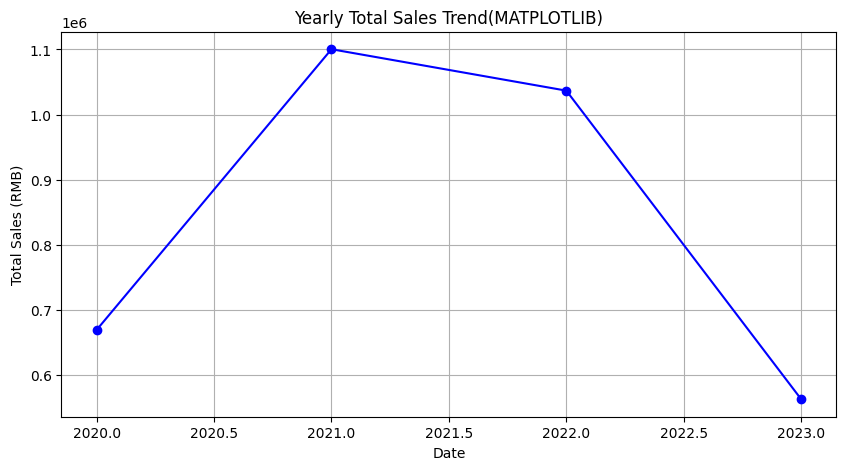

In [58]:
plt.figure(figsize=(10, 5))
plt.plot(sales_trend['Date'], sales_trend['total_sales'], marker='o',color='blue')
plt.title('Yearly Total Sales Trend(MATPLOTLIB)')
plt.xlabel('Date')
plt.ylabel('Total Sales (RMB)')
plt.grid(True)
plt.savefig('Totalsales(Matplotib).png')
plt.show()

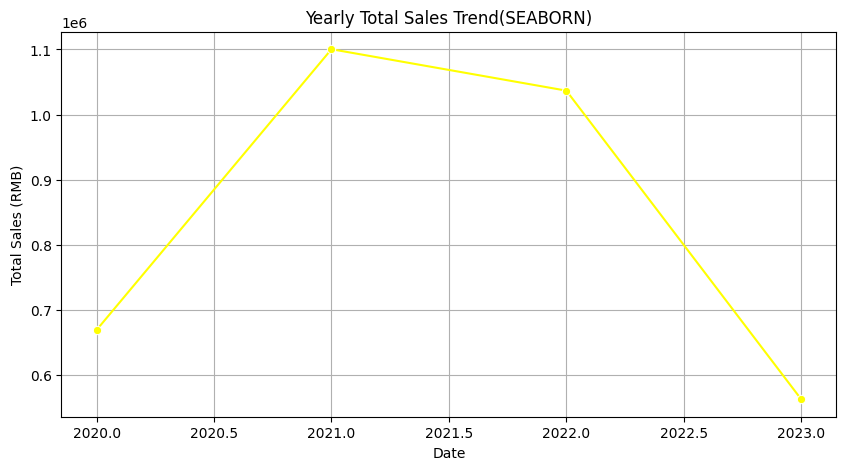

In [59]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_trend, x='Date', y='total_sales', marker='o',color='yellow')
plt.title('Yearly Total Sales Trend(SEABORN)')
plt.xlabel('Date')
plt.ylabel('Total Sales (RMB)')
plt.grid(True)
plt.savefig('TotalSales(Seaborn).png')
plt.show()

In [60]:
fig_line = px.line(sales_trend, x='Date', y='total_sales', title='Yearly Total Sales Trend (PLOTLY Express)', markers=True)
fig_line.update_layout(xaxis_title='Date', yaxis_title='Total Sales (RMB)')
plt.savefig('Total sales(PlotlyExpress).png')
fig_line.show()

<Figure size 640x480 with 0 Axes>

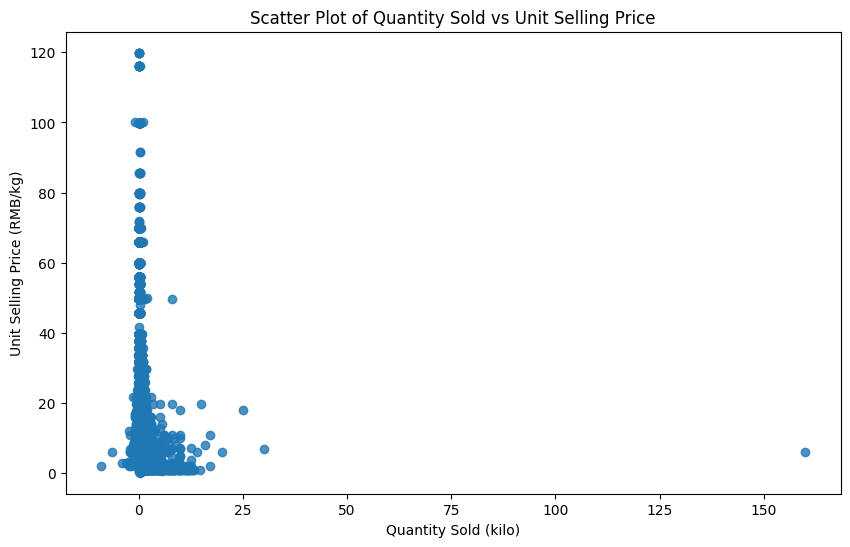

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(final_data['Quantity Sold (kilo)'], final_data['Unit Selling Price (RMB/kg)'], alpha=0.8)
plt.title('Scatter Plot of Quantity Sold vs Unit Selling Price')
plt.xlabel('Quantity Sold (kilo)')
plt.ylabel('Unit Selling Price (RMB/kg)')
plt.savefig('ScatterPlot(QS,USP).png')
plt.show()

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', data = final_data, alpha=0.3)
plt.title('Scatter Plot of Quantity Sold vs Unit Selling Price (SEABORN)')
plt.savefig('Scatterplot(seaborn).png')
plt.show()

In [ ]:
fig = px.scatter(final_data, x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', title='Scatter Plot of Quantity Sold vs Unit Selling Price (PLOTLY Express)')
fig.show()

In [ ]:
agg_data = final_data.groupby('Item Name').agg({'Quantity Sold (kilo)': 'sum','Unit Selling Price (RMB/kg)': 'mean'}).reset_index()

plt.figure(figsize=(10, 7))

sns.scatterplot(x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', data=agg_data, alpha=0.5,hue='Item Name', palette='dark',legend=False)
plt.title('Scatter Plot of Quantity Sold vs Unit Selling Price (Aggregated Data)')
plt.show()

In [ ]:
agg_data =final_data.groupby('Item Name').agg({'Quantity Sold (kilo)': 'sum','Unit Selling Price (RMB/kg)': 'mean'}).reset_index()

fig = px.scatter(agg_data, x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', title='Plotly scatter plot with aggregation : Quantity sold vs. average unit selling price', color='Item Name')

fig.show()

In [ ]:
final_data.head(2)

In [ ]:
agg_data = final_data.groupby('Category Name').agg({'Quantity Sold (kilo)': 'sum', 'Unit Selling Price (RMB/kg)': 'mean', 'total_sales': 'sum'}).reset_index()


In [ ]:
fig = px.scatter_3d(agg_data, x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', z='total_sales',title= 'Plotly 3d scatter plot : quantity sold vs. average unit selling price vs. total sales', color='Category Name',symbol='Category Name', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
agg_data = final_data.groupby('Item Name').agg({'Quantity Sold (kilo)': 'sum', 'Unit Selling Price (RMB/kg)': 'mean', 'total_sales': 'sum'}).reset_index()


In [ ]:
fig = px.scatter_3d(agg_data, x='Quantity Sold (kilo)', y='Unit Selling Price (RMB/kg)', z='total_sales',title= 'Plotly 3d scatter plot : quantity sold vs. average unit selling price vs. total sales', color='Item Name',symbol='Item Name', color_discrete_sequence=px.colors.qualitative.Set1)

fig.show()

In [ ]:
correlation_matrix = final_data.select_dtypes(include=['number']).corr()
correlation_matrix

In [ ]:
final_data.dtypes

In [ ]:
plt.figure(figsize=(9, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.3f')
plt.title('Correlation Heatmap of final_data')
plt.show()

In [ ]:
final_data[["Quantity Sold (kilo)", "Unit Selling Price (RMB/kg)", "Wholesale Price (RMB/kg)"]].corr()